Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')
Prediction for 75m²: 601038.5217706099


C:\Users\tania\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


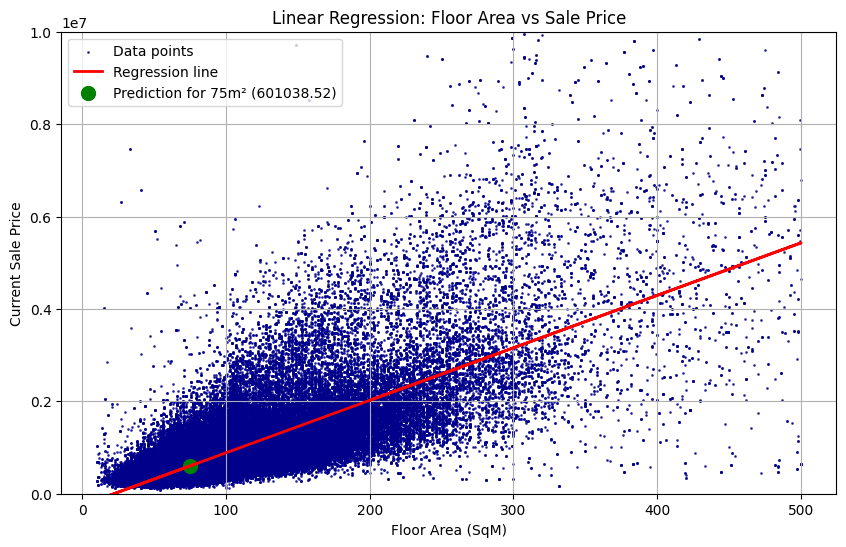

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("kaggle_london_house_price_data.csv")
print(df.columns)  # Inspect column names

# Data preprocessing
df = df.dropna(subset=['floorAreaSqM', 'saleEstimate_currentPrice'])  # Drop rows with missing values
X = df[['floorAreaSqM']].values  # Feature: Size in square meters
y = df['saleEstimate_currentPrice'].values  # Target: Current sale price

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for a specific floor area
X_new = [[75]]  # Floor area in square meters (example: 75 m²)
prediction = model.predict(X_new)  # Output: predicted price for 75 m²
print(f"Prediction for 75m²: {prediction[0]}")

# Visualize the data with regression line
plt.figure(figsize=(10, 6))
plt.ylim(0, 10e6)  # Set range for Y
plt.scatter(X, y, color='darkblue', s=1, label="Data points", alpha=0.7)  # Smaller points
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression line")  # Regression line

# Add the predicted point for 75 m²
plt.scatter(X_new, prediction, color="green", s=100, label=f"Prediction for 75m² ({prediction[0]:.2f})")

# Add labels, title, and legend
plt.xlabel("Floor Area (SqM)")
plt.ylabel("Current Sale Price")
plt.title("Linear Regression: Floor Area vs Sale Price")
plt.legend()
plt.grid(True)
plt.show()
